In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("./heart.csv")


In [272]:
df=df.rename(columns={"chest_type":"chest_paintype","fbs":"fasting_blood_sugar"})


In [273]:

df.head()

,age,sex,chest_paintype,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [274]:
df.tail()

,age,sex,chest_paintype,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [275]:
df['age'][df['target']==1].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [276]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [277]:
df.groupby(["chest_paintype"]).max()

,age,sex,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
chest_paintype,,,,,,,,,,,,,
0,77,1,200,409,1,2,186,1,6.2,2,4,3,1
1,74,1,192,342,1,1,202,1,1.8,2,4,3,1
2,76,1,180,564,1,2,194,1,3.6,2,4,3,1
3,69,1,178,298,1,1,190,1,4.2,2,2,3,1


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

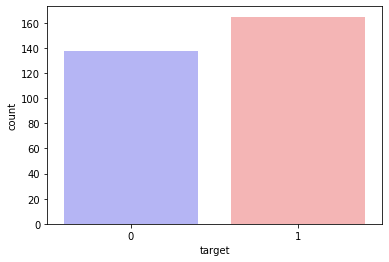

In [90]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [102]:
temp=df[["sex","chol"]]

In [101]:
temp

,sex,chol
0,1,233
1,1,250
2,0,204
3,1,236
4,0,354
...,...,...
298,0,241
299,1,264
300,1,193
301,1,131


# Scatter

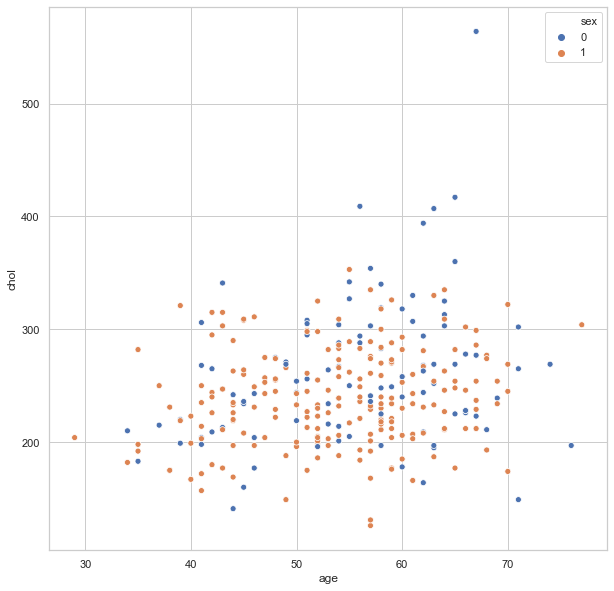

In [256]:
sns.set(style='whitegrid')

# plt.rcParams['xtick.markers']=
plt.rcParams['figure.figsize']=10,10

xyz=sns.scatterplot(data=df,x="age",y="chol",hue="sex",ci=False)


# LINE PLOT: (for concept sake)  #ignore this

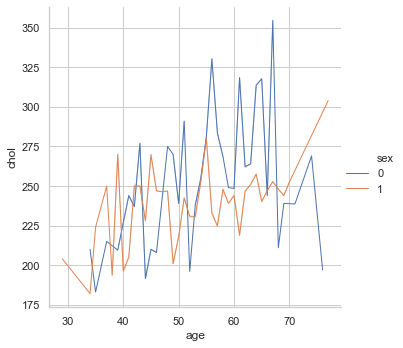

In [257]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=1,10
plt.rcParams['lines.linewidth']=1
sns.relplot(data=df,x="age",y="chol",kind="line",hue="sex",ci=False)

# catplot
chestpaintype vs age

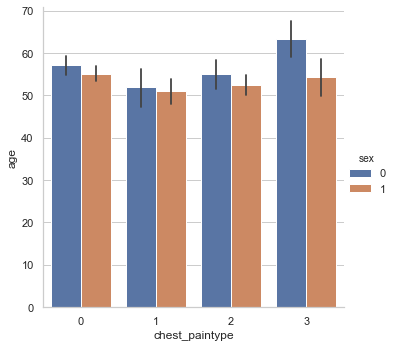

In [278]:
g=sns.catplot(x="chest_paintype",y="age",hue="sex",kind="bar",data=df)


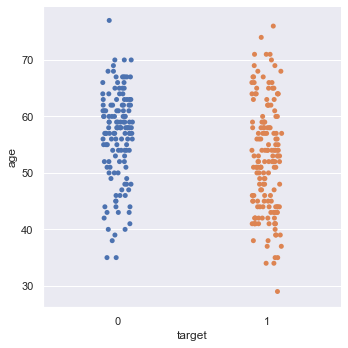

In [299]:
plt.rcParams['figure.figsize']=100,100
g=sns.catplot(x="target",y="age",data=df)



# violin plot

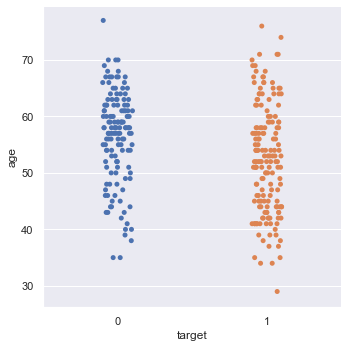

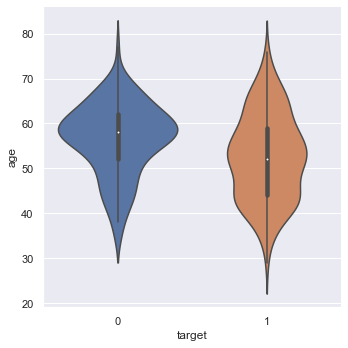

In [302]:
plt.rcParams['figure.figsize']=100,100

g=sns.catplot(x="target",y="age",data=df,kind="violin")
g=sns.swarnplot(x="target",y="age",data=df)